In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

from subprocess import check_output

In [2]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [3]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

In [4]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

In [5]:
df_train = pd.read_csv("dataset regionall.csv")
df_train.head()

,Daerah,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
0,Kab. Lebak,340,53680341,2015,126.42,9.97,1268.004012,62.030000,4436.20,6.20
1,Kab. Pandeglang,326,51469974,2015,124.42,10.43,1192.905081,62.720000,5067.20,5.81
2,Kab. Serang,326,51469974,2015,74.85,5.09,1470.530452,64.610000,3954.27,5.09
3,Kab. Tangerang,246,38839306,2015,191.12,5.71,3347.110333,70.050000,4784.90,5.60
4,Kab. Bandung,270,54265335,2015,281.04,8.00,3513.000000,70.048031,4863.23,5.89


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
Daerah         340 non-null object
sumDesa        340 non-null int64
danadesa       340 non-null int64
tahun          340 non-null int64
miskin         340 non-null float64
miskin_perc    340 non-null float64
populasi       340 non-null float64
ipm            255 non-null float64
pdrb_tani      255 non-null float64
pdrb_growth    255 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 26.6+ KB


In [7]:
i = df_train.loc[df_train["Daerah"]=="Indonesia"]
i

,Daerah,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
84,Indonesia,74754,9066200000,2015,28513.57,11.13,256186.6128,69.55,1171445.8,4.88
169,Indonesia,74754,49982080000,2016,27764.32,10.70,259479.6262,70.18,1210955.5,5.03
339,Indonesia,74954,60000000000,2018,25674.58,9.66,265782.4020,NaN,NaN,NaN


In [8]:
t2017 = df_train.loc[df_train["tahun"] == 2017]
t2017.tail()

,Daerah,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
250,Kab. Bantul,75,77730491,2017,139.67,14.07,992.679460,78.67,2032.34,5.10
251,Kab. Gunung Kidul,144,132353781,2017,135.74,18.65,727.828418,68.73,2664.85,5.00
252,Kab. Kulon Progo,87,77627477,2017,84.17,20.03,420.219671,73.23,1178.49,5.97
253,Kab. Sleman,86,80855810,2017,96.75,8.13,1190.036900,82.85,2047.96,5.35
254,Indonesia,74954,60000000000,2017,26582.99,10.12,262677.766800,70.81,1257875.50,5.07


In [9]:
data = df_train.drop([84,169,254,339])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 338
Data columns (total 10 columns):
Daerah         336 non-null object
sumDesa        336 non-null int64
danadesa       336 non-null int64
tahun          336 non-null int64
miskin         336 non-null float64
miskin_perc    336 non-null float64
populasi       336 non-null float64
ipm            252 non-null float64
pdrb_tani      252 non-null float64
pdrb_growth    252 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 28.9+ KB


In [10]:
data.describe()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
count,336.000000,3.360000e+02,336.000000,336.000000,336.000000,336.000000,252.000000,252.000000,252.000000
mean,261.660714,1.671561e+08,2016.500000,151.663661,12.231875,1325.071555,68.318097,4657.302817,5.418651
std,97.395567,1.308894e+08,1.119701,75.211058,4.116944,814.398000,3.920843,2567.924541,1.978051
min,16.000000,1.000000e+00,2015.000000,7.980000,3.890000,181.106613,58.180000,331.330000,0.080000
25%,197.500000,6.375675e+07,2015.750000,99.060000,9.655000,868.980686,65.520000,3062.472500,5.037500
50%,266.000000,1.676770e+08,2016.500000,136.370000,11.690000,1150.138658,68.115000,3936.815000,5.295000
75%,327.000000,2.302680e+08,2017.250000,191.402500,14.382500,1553.576661,70.447500,5794.902500,5.712500
max,469.000000,1.745276e+09,2018.000000,490.800000,25.690000,5812.605000,82.850000,15612.160000,23.530000


In [11]:
data = data.drop(["sumDesa", "danadesa", "populasi"], axis=1)
data = data.set_index("Daerah")
data.head()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
Daerah,,,,,,
Kab. Lebak,2015,126.42,9.97,62.030000,4436.20,6.20
Kab. Pandeglang,2015,124.42,10.43,62.720000,5067.20,5.81
Kab. Serang,2015,74.85,5.09,64.610000,3954.27,5.09
Kab. Tangerang,2015,191.12,5.71,70.050000,4784.90,5.60
Kab. Bandung,2015,281.04,8.00,70.048031,4863.23,5.89


In [12]:
data.describe()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
count,336.000000,336.000000,336.000000,252.000000,252.000000,252.000000
mean,2016.500000,151.663661,12.231875,68.318097,4657.302817,5.418651
std,1.119701,75.211058,4.116944,3.920843,2567.924541,1.978051
min,2015.000000,7.980000,3.890000,58.180000,331.330000,0.080000
25%,2015.750000,99.060000,9.655000,65.520000,3062.472500,5.037500
50%,2016.500000,136.370000,11.690000,68.115000,3936.815000,5.295000
75%,2017.250000,191.402500,14.382500,70.447500,5794.902500,5.712500
max,2018.000000,490.800000,25.690000,82.850000,15612.160000,23.530000


In [13]:
t2018 = data.loc[data["tahun"]==2018]
t2018.tail()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
Daerah,,,,,,
Kota Batu,2018,7.98,3.89,NaN,NaN,NaN
Kab. Bantul,2018,134.84,13.43,NaN,NaN,NaN
Kab. Gunung Kidul,2018,125.76,17.12,NaN,NaN,NaN
Kab. Kulon Progo,2018,77.72,18.30,NaN,NaN,NaN
Kab. Sleman,2018,92.04,7.65,NaN,NaN,NaN


In [14]:
t2017 = data.loc[data["tahun"]==2017]
t2017.tail()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
Daerah,,,,,,
Kota Batu,2017,8.77,4.31,74.26,1469.64,6.56
Kab. Bantul,2017,139.67,14.07,78.67,2032.34,5.10
Kab. Gunung Kidul,2017,135.74,18.65,68.73,2664.85,5.00
Kab. Kulon Progo,2017,84.17,20.03,73.23,1178.49,5.97
Kab. Sleman,2017,96.75,8.13,82.85,2047.96,5.35


In [15]:
t2016 = data.loc[data["tahun"]==2016]
t2016.tail()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
Daerah,,,,,,
Kota Batu,2016,9.05,4.48,73.57,1436.88,6.61
Kab. Bantul,2016,142.76,14.55,78.42,1982.71,5.06
Kab. Gunung Kidul,2016,139.15,19.34,67.82,2613.14,4.89
Kab. Kulon Progo,2016,84.34,20.30,72.38,1158.71,4.76
Kab. Sleman,2016,96.63,8.21,82.15,2025.85,5.25


In [16]:
t2015 = data.loc[data["tahun"]==2015]
t2015.tail()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
Daerah,,,,,,
Kota Batu,2015,9.43,4.71,72.62,1370.26,6.69
Kab. Bantul,2015,160.15,16.33,77.99,1952.98,4.97
Kab. Gunung Kidul,2015,155.00,21.73,67.41,2557.40,4.82
Kab. Kulon Progo,2015,88.13,21.40,71.52,1138.92,4.62
Kab. Sleman,2015,110.96,9.46,81.20,2003.47,5.18


In [17]:
t2018.describe()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
count,84.0,84.000000,84.000000,0.0,0.0,0.0
mean,2018.0,138.090238,11.062024,NaN,NaN,NaN
std,0.0,66.539371,3.771295,NaN,NaN,NaN
min,2018.0,7.980000,3.890000,NaN,NaN,NaN
25%,2018.0,89.612500,8.337500,NaN,NaN,NaN
50%,2018.0,125.755000,10.335000,NaN,NaN,NaN
75%,2018.0,173.607500,13.130000,NaN,NaN,NaN
max,2018.0,415.020000,21.210000,NaN,NaN,NaN


In [18]:
t2017.describe()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
count,84.0,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2017.0,153.164524,12.287381,68.918929,4773.469762,5.290595
std,0.0,76.511947,4.055681,3.884871,2646.290085,1.005769
min,2017.0,8.770000,4.310000,59.900000,346.290000,1.450000
25%,2017.0,99.017500,9.875000,66.310000,3129.447500,5.067500
50%,2017.0,138.155000,11.725000,68.800000,3994.090000,5.275000
75%,2017.0,191.215000,14.090000,70.812500,5936.187500,5.725000
max,2017.0,487.280000,23.560000,82.850000,15612.160000,10.260000


In [19]:
t2016.describe()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
count,84.0,84.00000,84.000000,84.000000,84.000000,84.000000
mean,2016.0,155.16500,12.541786,68.313929,4679.683214,5.637976
std,0.0,77.39558,4.134481,3.906839,2590.258124,2.861343
min,2016.0,9.05000,4.480000,59.090000,343.360000,0.080000
25%,2016.0,101.62500,10.022500,65.662500,3043.930000,5.057500
50%,2016.0,141.38500,11.920000,68.210000,3903.690000,5.330000
75%,2016.0,196.06500,14.482500,70.365000,5860.430000,5.702500
max,2016.0,490.80000,24.110000,82.150000,15378.280000,23.530000


In [20]:
t2015.describe()

,tahun,miskin,miskin_perc,ipm,pdrb_tani,pdrb_growth
count,84.0,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2015.0,160.234881,13.036310,67.721433,4518.755476,5.327381
std,0.0,79.272538,4.301642,3.925327,2489.121800,1.599930
min,2015.0,9.430000,4.710000,58.180000,331.330000,1.270000
25%,2015.0,106.040000,10.300000,64.877047,2950.715000,4.965000
50%,2015.0,146.460000,12.500000,67.712253,3840.785000,5.275000
75%,2015.0,200.957500,14.965000,69.892500,5585.405000,5.612500
max,2015.0,487.100000,25.690000,81.200000,14958.590000,17.420000


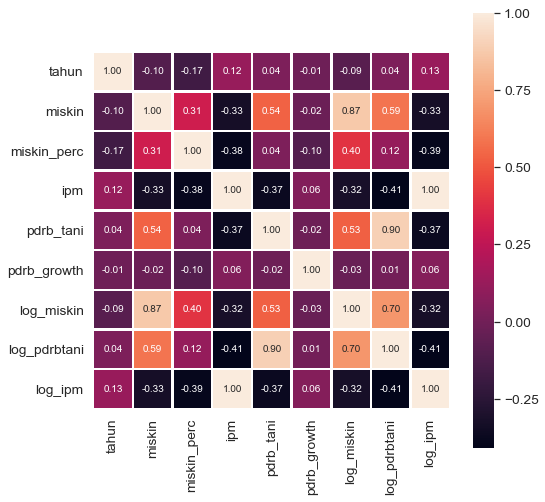

In [40]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.25)
sns.heatmap(data.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

In [38]:
data["log_miskin"] = np.log(data["miskin"])
data["log_pdrbtani"] = np.log(data["pdrb_tani"])
data["log_ipm"] = np.log(data["ipm"])

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 792x792 with 0 Axes>

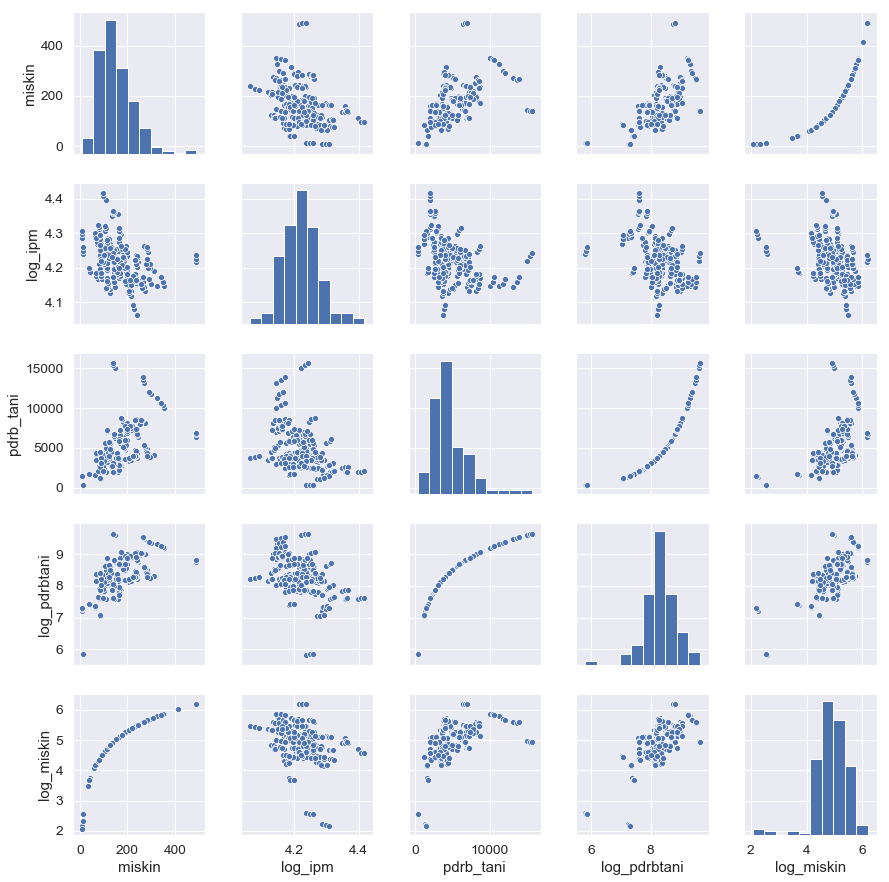

In [39]:
plt.figure(figsize=(11, 11))
sns.pairplot(data[['miskin','log_ipm','pdrb_tani', "log_pdrbtani", "log_miskin"]])
plt.show()